# **Movie Data Exploratory Data Analysis**
### Goals:

The main goal of this EDA is to gain a better understanding of key patterns, distributions, and trends within the TMDB + IMDB movie dataset. Specifically, I wanted to:

- Examine feature distributions such as revenue, budget, ratings, votes, and runtime to detect skew, outliers, and general trends.
- Clean and subset the data to focus on relevant and meaningful records (removing zero-budget movies, trimming unrealistic runtimes).
- Analyze correlations between variables like votes, critic acclaim, budget, and profit to identify potential predictive relationships.
- Explore genre frequency and performance, including counts and average profitability by genre.
- Prepare the dataset for future modeling by applying necessary transformations like log-scaling and ensuring numeric consistency.
- Analyze which realationships will make the best features inside of modeling


In [705]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import ast
from collections import Counter
from wordcloud import WordCloud

In [706]:
df = pd.read_csv("TMDB_all_movies_cleaned.csv", keep_default_na=False)

In [707]:
df.head(10)

,id,title,release_date,revenue,runtime,budget,original_language,overview,tagline,genres,...,music_composer,poster_url,year,month,day,votes,average_rating,critic_acclaim_weight,profit_in_millions,profit_weight
0,2,Ariel,1988-10-21,0.0,73.0,0.0,fi,A Finnish man goes to the city to find a job a...,,"['Comedy', 'Drama', 'Romance', 'Crime']",...,[],https://image.tmdb.org/t/p/w500/ojDg0PGvs6R9xY...,1988,10,Friday,9192.0,7.2500,666.42,0.00,0.00
1,3,Shadows in Paradise,1986-10-17,0.0,74.0,0.0,fi,"Nikander, a rubbish collector and would-be ent...",,"['Comedy', 'Drama', 'Romance']",...,[],https://image.tmdb.org/t/p/w500/nj01hspawPof0m...,1986,10,Friday,8023.0,7.3465,589.41,0.00,0.00
2,5,Four Rooms,1995-12-09,4257354.0,98.0,4000000.0,en,It's Ted the Bellhop's first night on the job....,Twelve outrageous guests. Four scandalous requ...,['Comedy'],...,['Combustible Edison'],https://image.tmdb.org/t/p/w500/75aHn1NOYXh4M7...,1995,12,Saturday,114283.0,6.2810,7178.12,0.26,297.14
3,6,Judgment Night,1993-10-15,12136938.0,109.0,21000000.0,en,"Four young friends, while taking a shortcut en...",Don't move. Don't whisper. Don't even breathe.,"['Action', 'Crime', 'Thriller']",...,['Alan Silvestri'],https://image.tmdb.org/t/p/w500/3rvvpS9YPM5HB2...,1993,10,Friday,19989.0,6.5500,1309.28,-8.86,-1771.03
4,8,Life in Loops (A Megacities RMX),2006-01-01,0.0,80.0,42000.0,en,Timo Novotny labels his new project an experim...,A Megacities remix.,['Documentary'],...,[],https://image.tmdb.org/t/p/w500/7ln81BRnPR2wqx...,2006,1,Sunday,285.0,7.8000,22.23,-0.04,-0.11
5,9,Sunday in August,2004-09-02,0.0,15.0,0.0,de,,,['Drama'],...,['Christian Biegai'],No Poster Available,2004,9,Thursday,28.0,6.8000,1.90,0.00,0.00
6,11,Star Wars,1977-05-25,775398007.0,121.0,11000000.0,en,Princess Leia is captured and held hostage by ...,"A long time ago in a galaxy far, far away...","['Adventure', 'Action', 'Science Fiction']",...,['John Williams'],https://image.tmdb.org/t/p/w500/6FfCtAuVAW8XJj...,1977,5,Wednesday,1512131.0,8.4000,127019.00,764.40,11558729.36
7,12,Finding Nemo,2003-05-30,940335536.0,100.0,94000000.0,en,"Nemo, an adventurous young clownfish, is unexp...",There are 3.7 trillion fish in the ocean. They...,"['Animation', 'Family']",...,['Thomas Newman'],https://image.tmdb.org/t/p/w500/eHuGQ10FUzK1md...,2003,5,Friday,1161705.0,8.0080,93029.34,846.34,9831974.10
8,13,Forrest Gump,1994-06-23,677387716.0,142.0,55000000.0,en,A man with a low IQ has accomplished great thi...,The world will never be the same once you've s...,"['Comedy', 'Drama', 'Romance']",...,['Alan Silvestri'],https://image.tmdb.org/t/p/w500/arw2vcBveWOVZr...,1994,6,Thursday,2383253.0,8.6340,205770.06,622.39,14833128.35
9,14,American Beauty,1999-09-15,356296601.0,122.0,15000000.0,en,"Lester Burnham, a depressed suburban father in...",...Look closer.,['Drama'],...,['Thomas Newman'],https://image.tmdb.org/t/p/w500/wby9315QzVKdW9...,1999,9,Wednesday,1249943.0,8.1540,101920.35,341.30,4266055.46


### **Understanding what the cleaned data looks like**

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446978 entries, 0 to 446977
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       446978 non-null  int64  
 1   title                    446978 non-null  object 
 2   release_date             446978 non-null  object 
 3   revenue                  446978 non-null  float64
 4   runtime                  446978 non-null  float64
 5   budget                   446978 non-null  float64
 6   original_language        446978 non-null  object 
 7   overview                 446978 non-null  object 
 8   tagline                  446978 non-null  object 
 9   genres                   446978 non-null  object 
 10  production_companies     446978 non-null  object 
 11  production_countries     446978 non-null  object 
 12  spoken_languages         446978 non-null  object 
 13  cast                     446978 non-null  object 
 14  dire

In [709]:
df.describe()

,id,revenue,runtime,budget,year,month,votes,average_rating,critic_acclaim_weight,profit_in_millions,profit_weight
count,4.469780e+05,4.469780e+05,446978.000000,4.469780e+05,446978.000000,446978.000000,4.469780e+05,446978.000000,446978.000000,446978.000000,4.469780e+05
mean,5.223890e+05,1.773524e+06,73.577113,6.359706e+05,1997.013119,6.260791,2.751712e+03,5.319765,190.840426,1.137568,4.323598e+03
std,3.778028e+05,2.714907e+07,60.995634,7.080793e+06,27.286937,3.708991,3.173108e+04,1.881165,2473.265126,22.273470,1.716912e+05
min,2.000000e+00,-1.200000e+01,1.000000,0.000000e+00,1900.000000,1.000000,1.000000e+00,0.000000,0.000000,-199.550000,-7.172223e+05
25%,2.220062e+05,0.000000e+00,36.000000,0.000000e+00,1983.000000,3.000000,1.500000e+01,3.750000,0.560000,0.000000,0.000000e+00
50%,4.471865e+05,0.000000e+00,84.000000,0.000000e+00,2008.000000,6.000000,5.200000e+01,5.450000,2.510000,0.000000,0.000000e+00
75%,7.658262e+05,0.000000e+00,97.000000,0.000000e+00,2017.000000,10.000000,2.530000e+02,6.600000,13.990000,0.000000,0.000000e+00
max,1.489890e+06,3.000000e+09,14400.000000,4.654000e+08,2025.000000,12.000000,3.049541e+06,10.000000,274611.170000,2750.000000,3.848245e+07


### **Listing Available Features**
- Printing all column names allows us to understand what attributes we can analyze and model later. This also helps in identifying which features may need encoding or transformation.


In [710]:
# list of all columns
columns = df.columns.tolist()
columns

['id',
 'title',
 'release_date',
 'revenue',
 'runtime',
 'budget',
 'original_language',
 'overview',
 'tagline',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages',
 'cast',
 'director',
 'director_of_photography',
 'writers',
 'producers',
 'music_composer',
 'poster_url',
 'year',
 'month',
 'day',
 'votes',
 'average_rating',
 'critic_acclaim_weight',
 'profit_in_millions',
 'profit_weight']

### **Initial distributions of the whole dataset**
- These plots help identify potential outliers, skewed distributions, or any unusual patterns in the data that may require further cleaning or transformation.

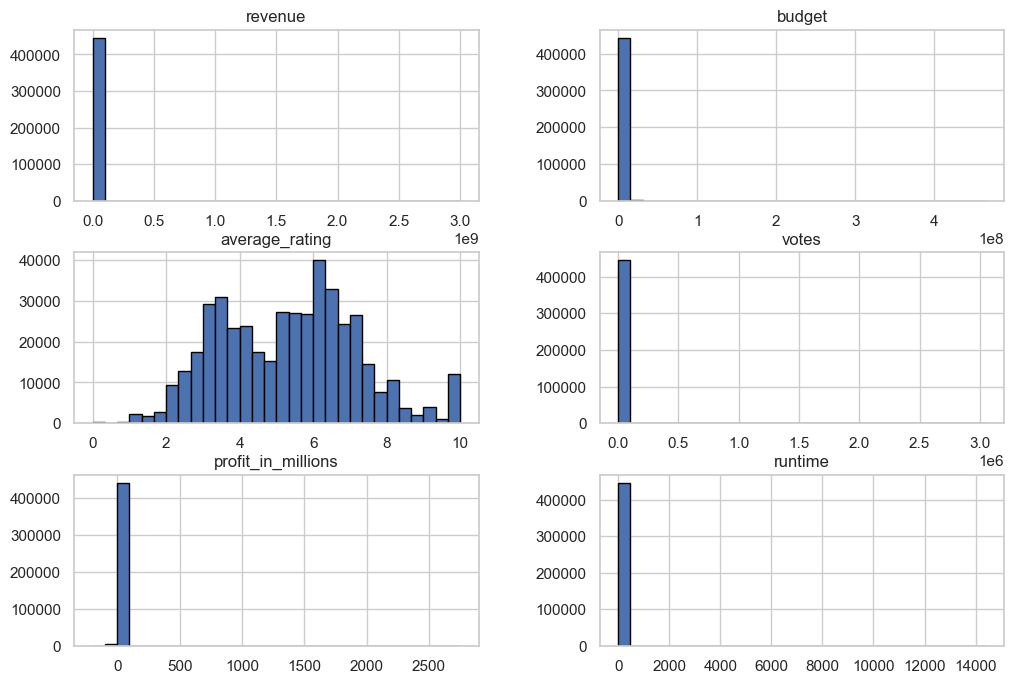

In [711]:
cols = ['revenue', 'budget', 'average_rating', 'votes', 'profit_in_millions', 'runtime']

# create distributions of all valuable numeric columns 
df[cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.show()

### **There is a fair amount of uneven-ness inside of the data distributions**
- To address the imbalance in the full dataset, I’m subsetting the data specifically for EDA.
- This approach allows me to focus on the most meaningful patterns while minimizing more obscure movie entries from affecting the main picture of analysis.
- In the movie industry, the majority of films tend to underperform, so it’s important to be mindful of this distribution.
- While the full cleaned dataset will be used for modeling to reflect real-world complexity, this subset enables a clearer analysis of the key drivers behind successful films.

In [712]:
df_eda = df[df['votes'] > 100].copy()
df_eda = df_eda[df_eda['budget'] != 0]
df_eda = df_eda[df_eda['revenue'] != 0]
df_eda = df_eda.sort_values(by='votes', ascending=False).head(5000)
df_eda

,id,title,release_date,revenue,runtime,budget,original_language,overview,tagline,genres,...,music_composer,poster_url,year,month,day,votes,average_rating,critic_acclaim_weight,profit_in_millions,profit_weight
228,278,The Shawshank Redemption,1994-09-23,2.834147e+07,142.0,25000000.0,en,Imprisoned in the 1940s for the double murder ...,Fear can hold you prisoner. Hope can set you f...,"['Drama', 'Crime']",...,['Thomas Newman'],https://image.tmdb.org/t/p/w500/9cqNxx0GxF0bfl...,1994,9,Friday,3049541.0,9.0050,274611.17,3.34,101854.67
116,155,The Dark Knight,2008-07-16,1.004558e+09,152.0,185000000.0,en,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"['Drama', 'Action', 'Crime', 'Thriller']",...,"['James Newton Howard', 'Hans Zimmer']",https://image.tmdb.org/t/p/w500/qJ2tW6WMUDux91...,2008,7,Wednesday,3025710.0,8.7600,265052.20,819.56,24797508.88
15707,27205,Inception,2010-07-15,8.390306e+08,148.0,160000000.0,en,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"['Action', 'Science Fiction', 'Adventure']",...,['Hans Zimmer'],https://image.tmdb.org/t/p/w500/oYuLEt3zVCKq57...,2010,7,Thursday,2688130.0,8.5845,230762.52,679.03,18253209.14
426,550,Fight Club,1999-10-15,1.008538e+08,139.0,63000000.0,en,A ticking-time-bomb insomniac and a slippery s...,Mischief. Mayhem. Soap.,['Drama'],...,"['Michael Simpson', 'John King']",https://image.tmdb.org/t/p/w500/pB8BM7pdSp6B6I...,1999,10,Friday,2469777.0,8.6190,212870.08,37.85,934810.59
8,13,Forrest Gump,1994-06-23,6.773877e+08,142.0,55000000.0,en,A man with a low IQ has accomplished great thi...,The world will never be the same once you've s...,"['Comedy', 'Drama', 'Romance']",...,['Alan Silvestri'],https://image.tmdb.org/t/p/w500/arw2vcBveWOVZr...,1994,6,Thursday,2383253.0,8.6340,205770.06,622.39,14833128.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88819,164251,Serena,2014-10-12,5.092129e+06,102.0,30000000.0,en,North Carolina mountains at the end of the 192...,Some loves can never let go.,['Drama'],...,['Johan Söderqvist'],https://image.tmdb.org/t/p/w500/6P1IgM4T3cOmEi...,2014,10,Sunday,31376.0,5.5000,1725.68,-24.91,-7815.76
6720,12088,Fortress,1992-12-18,6.739141e+06,95.0,8000000.0,en,"In the future, the inmates of a private underg...",Welcome to the future where punishment is the ...,"['Action', 'Thriller', 'Science Fiction']",...,[],https://image.tmdb.org/t/p/w500/evjpqWPUY4VpOd...,1992,12,Friday,31367.0,5.9500,1866.34,-1.26,-395.22
4862,9842,School for Scoundrels,2006-09-29,1.780000e+07,100.0,20000000.0,en,In the hope of winning the woman of his dreams...,Life's a game. Learn how to play.,"['Comedy', 'Romance']",...,['Christophe Beck'],https://image.tmdb.org/t/p/w500/3ib8zYmUr8gVrj...,2006,9,Friday,31356.0,5.6500,1771.61,-2.20,-689.83
113984,227783,The Nut Job,2014-01-17,1.225000e+08,85.0,42000000.0,en,"Surly, a curmudgeon, independent squirrel is b...","No nuts, no glory.","['Animation', 'Comedy', 'Family', 'Adventure']",...,['Paul Intson'],https://image.tmdb.org/t/p/w500/4iHnGlmOjAj2k5...,2014,1,Friday,31353.0,5.7500,1802.80,80.50,25239.16


### **Updated Distributions After Cutoff**
- We are seeing a bit of improvement, however there is still some adjustments that can be made
- I will further tweak the data in order to get better distributions that better help me understand what the data looks like

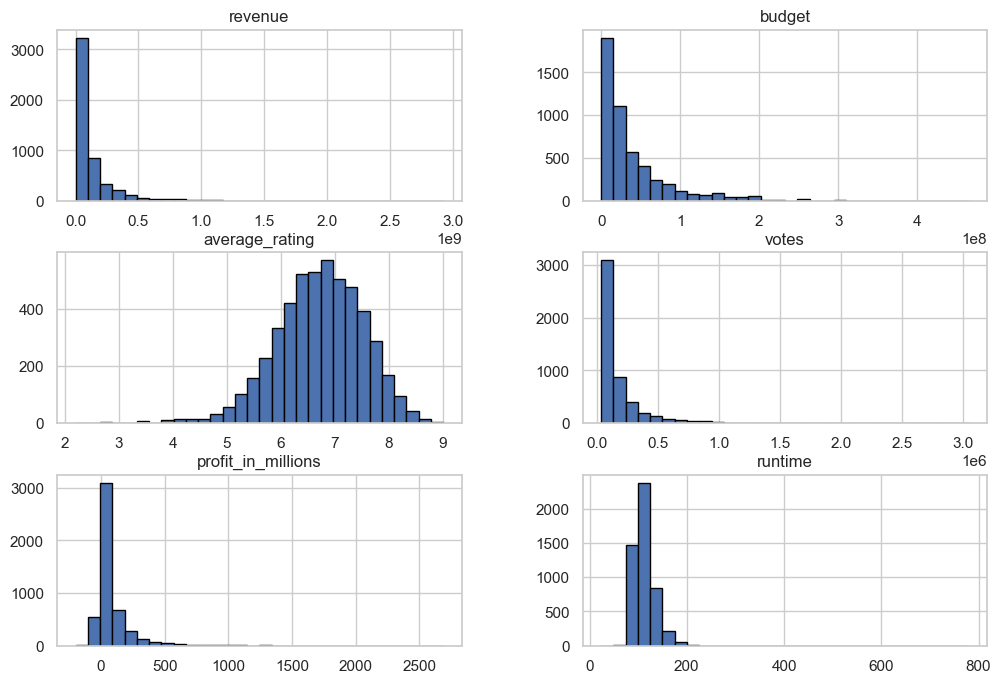

In [713]:
# plot distribution of cols again to view after data cutoff
df_eda[cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.show()

### **Basic Correlation Matrix to Explore Initial Relationships**

- This matrix provides a surface-level view of how the important numerical features relate to one another
- This will help identify potential patterns to dive into further later in analysis


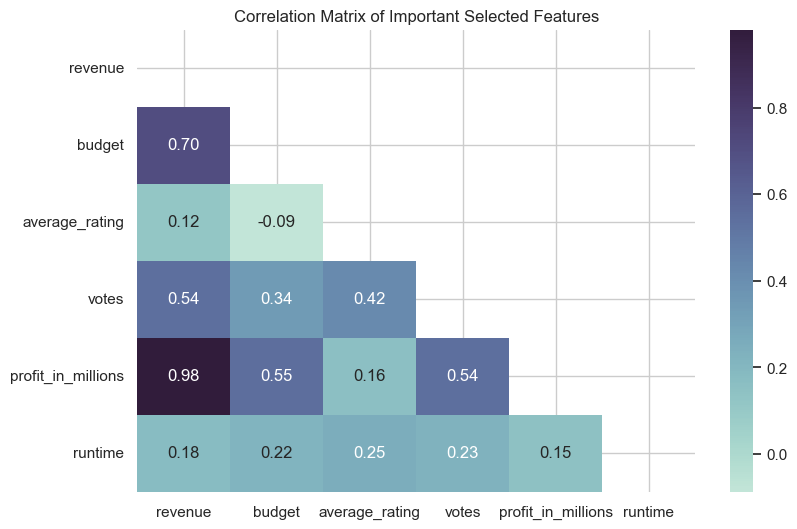

In [714]:
# create correlation matrix for cols 
corr_matrix = df_eda[cols].corr()
plt.figure(figsize=(9,6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Important Selected Features')
plt.show()

### **Exploring Key Numeric Features**

- Each key numeric variable is examined individually to understand its distribution, behavior, and overall role within the dataset
- This helps uncover patterns and potential issues to keep in mind that may affect future analysis or modeling
- Most distributions were handled by either: removing clear outliers to help the skew, or log transforming the data to get a better representation of its spread

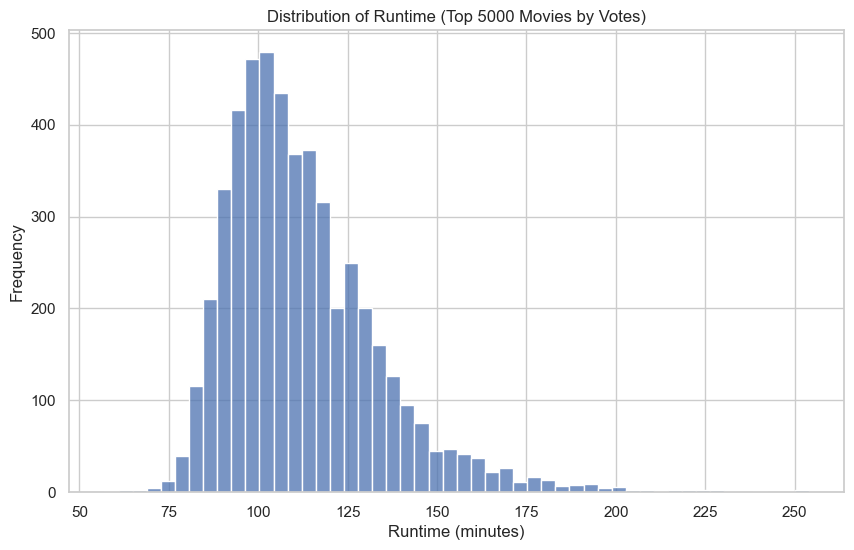

In [715]:
# remove outliers in runtime (movies longer than 5 hours) or (movies shorter than 45 minutes)
df_eda = df_eda[df_eda['runtime'] < 300]
df_eda = df_eda[df_eda['runtime'] > 45]
# show runtime distribution

plt.figure(figsize=(10, 6))
sns.histplot(df_eda['runtime'], bins=50)
plt.title('Distribution of Runtime (Top 5000 Movies by Votes)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

### **Log Transformation of Profit**
- Applying a log transformation to profit helps normalize its distribution, especially when there are large positive outliers and many low-profit or loss-making films. 
- This prepares the data for better visualization and modeling.


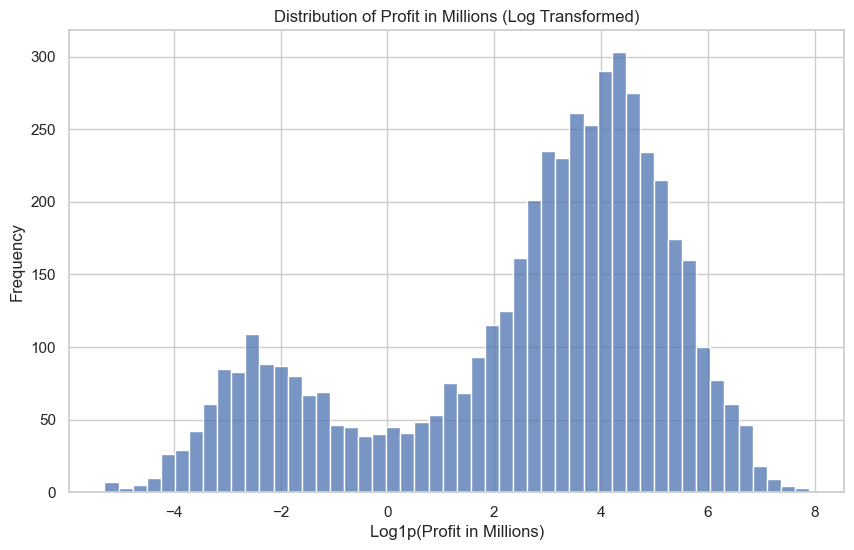

In [716]:
# this is often used in time series analysis to handle negative values, but here we will use it to visualize the distribution of profit
df_eda['profit_in_millions'] = df_eda['profit_in_millions'].apply(
    lambda x: np.sign(x) * np.log1p(abs(x))
) # account for negative profits and apply log1p transformation


# profit_in_millions distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['profit_in_millions'], bins=50)
plt.title('Distribution of Profit in Millions (Log Transformed)')
plt.xlabel('Log1p(Profit in Millions)')
plt.ylabel('Frequency')
plt.show()

### **Log Transformation of Votes**
- The vote count has large variability. Applying a log transformation here compresses extreme values and reveals more meaningful trends in mid-range values.


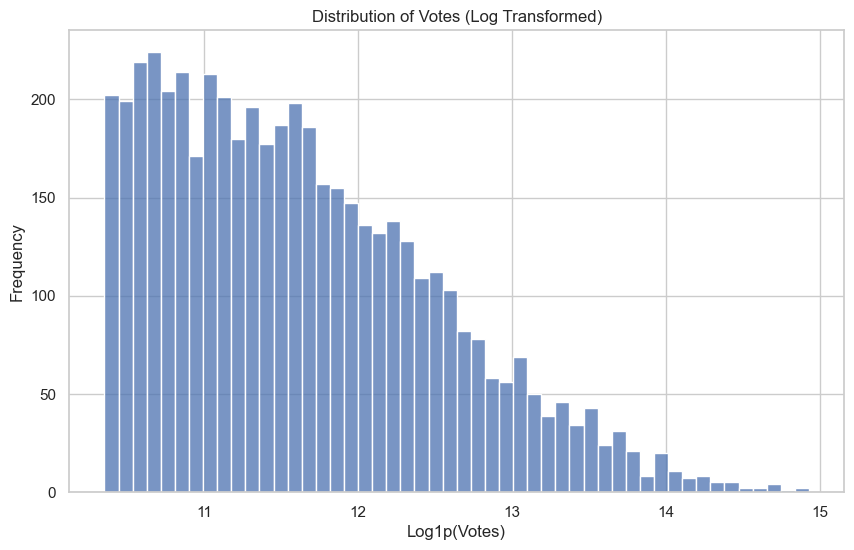

In [717]:
# same log transformation for votes as their are valid outliers 
df_eda['votes'] = np.log1p(df_eda['votes'])

# votes distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['votes'], bins=50)
plt.title('Distribution of Votes (Log Transformed)')
plt.xlabel('Log1p(Votes)')
plt.ylabel('Frequency')
plt.show()

### **Log Transformation of Budget and Revenue**
- To reduce skewness and improve visual interpretation, I log-transform budget and revenue. 
- This is especially useful when there are a few very high-budget blockbusters (that we still want to keep) compared to a majority of lower-budget films.

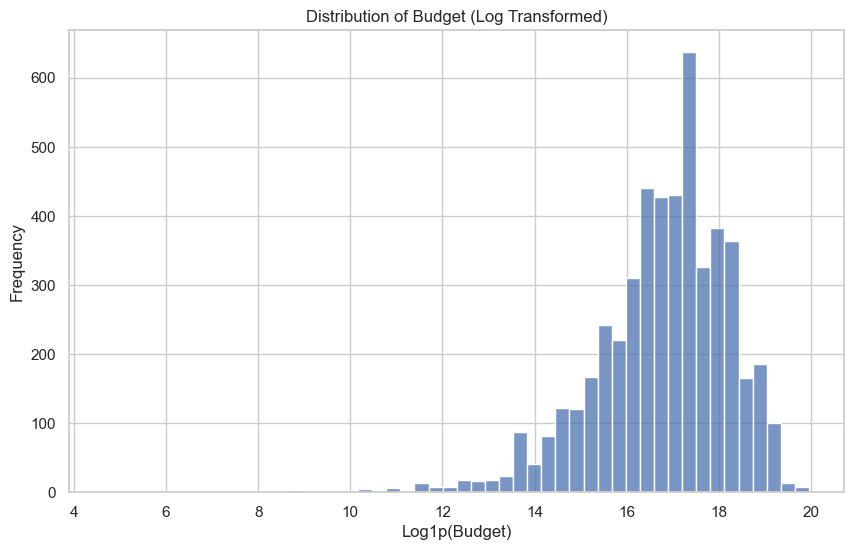

In [718]:
# log transform
df_eda['budget'] = np.log1p(df_eda['budget'])

# budget distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['budget'], bins=50)
plt.title('Distribution of Budget (Log Transformed)')
plt.xlabel('Log1p(Budget)')
plt.ylabel('Frequency')
plt.show()

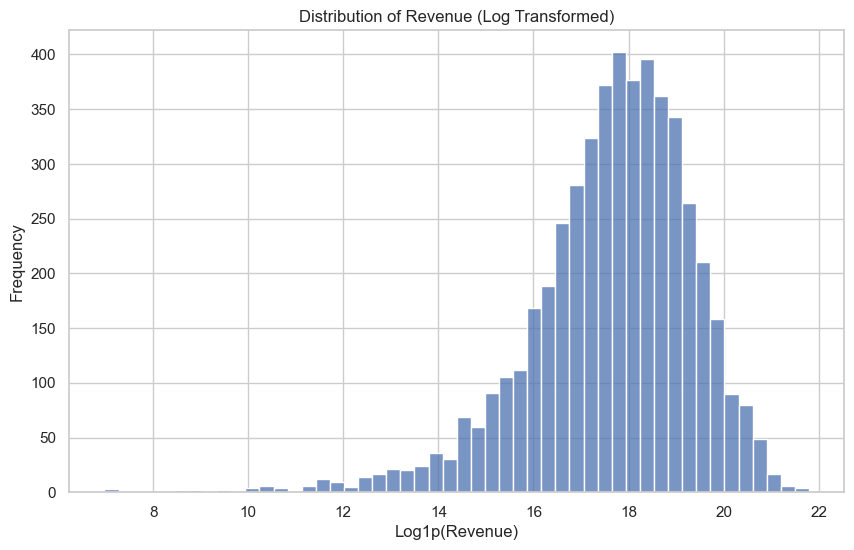

In [719]:
# log transform revenue
df_eda['revenue'] = np.log1p(df_eda['revenue'])

# revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['revenue'], bins=50)
plt.title('Distribution of Revenue (Log Transformed)')
plt.xlabel('Log1p(Revenue)')
plt.ylabel('Frequency')
plt.show()

### **Distributions After Cleaning and Transformation**

- The distributions of key numeric features show significant improvement after filtering and log transformations
- These adjustments make it easier to visualize and compare high-performing movies across all metrics

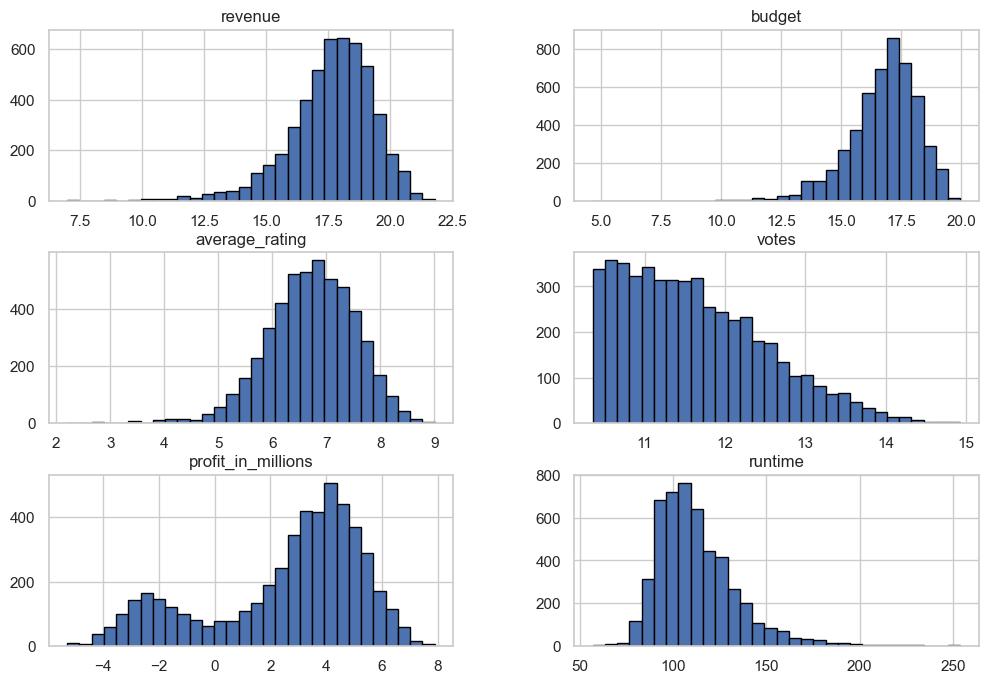

In [720]:
df_eda[cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.show()

### **Budget vs Revenue Density Plot**

- These two variables were a natural starting point for comparison, as they are core financial metrics in film analysis
- The plot reveals that revenue varies more widely across movies, while budget tends to peak around a consistent value
- It also highlights clusters of films with similar financial profiles and helps surface potential outliers


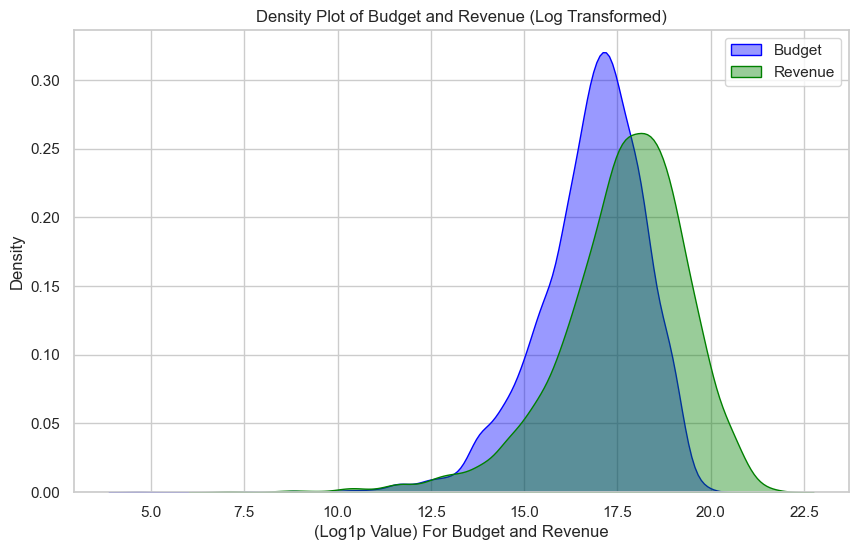

In [721]:
# density plot for budget and revenue 
plt.figure(figsize=(10, 6))
sns.kdeplot(df_eda['budget'], label='Budget', color='blue', fill=True, alpha=0.4)
sns.kdeplot(df_eda['revenue'], label='Revenue', color='green', fill=True, alpha=0.4)
plt.title('Density Plot of Budget and Revenue (Log Transformed)')
plt.xlabel('(Log1p Value) For Budget and Revenue')
plt.legend()

### **Ordering Days of the Week**
- For time-based categorical plots, I manually ordered the days of the week. 
- This helps when plotting features like release day trends, making sure they appear in calendar order.

In [722]:
# order days of the week for categorical analysis
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_eda['day'] = pd.Categorical(df_eda['day'], categories=days_order, ordered=True)

### **Plotting Release Day Visuals**
- Here, I am visualizing how movie releases are distributed across different days of the week.
- This includes the profit by day, ratings by day and distribution of movies released by day of the week
- Understanding which days hold most impact will help designing features for modeling later

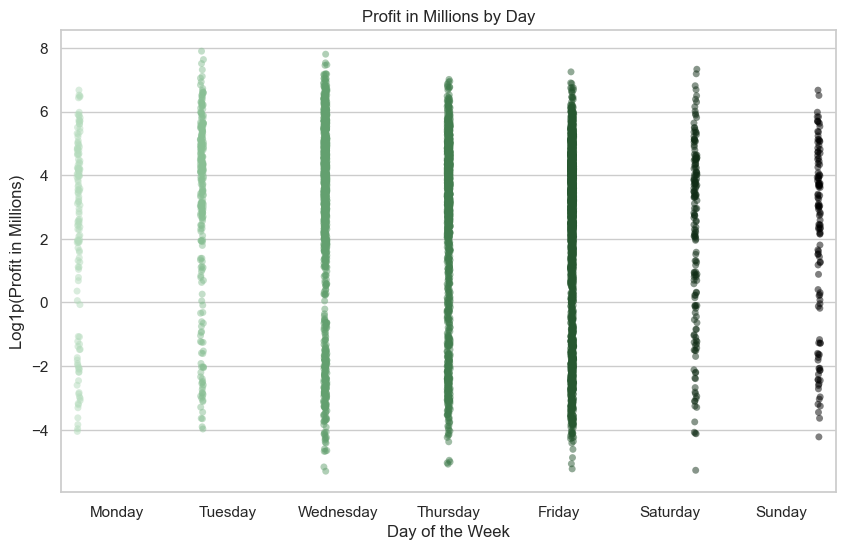

In [723]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_eda, x="day", y="profit_in_millions", hue="day",palette="ch: start=2, rot=0, dark=0, light=.80", dodge=True, alpha=0.5)
plt.title('Profit in Millions by Day')
plt.ylabel('Log1p(Profit in Millions)')
plt.xlabel('Day of the Week')
plt.legend().remove()
plt.show()

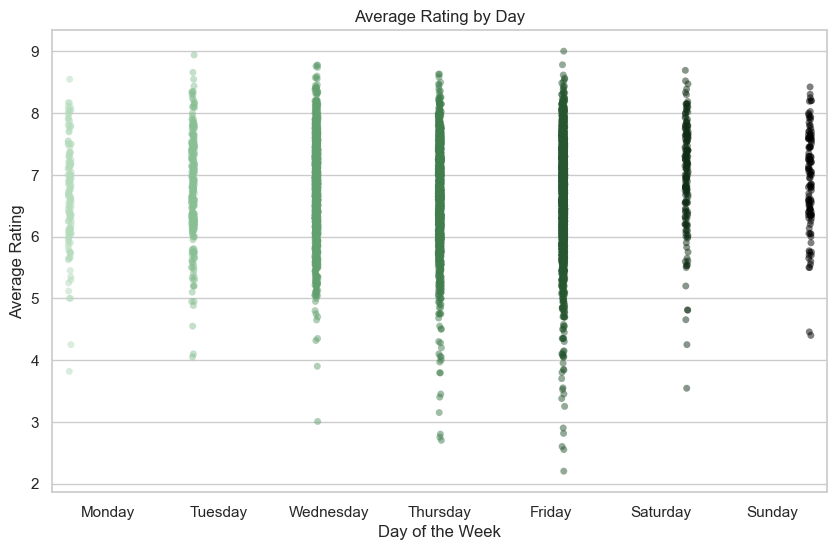

In [724]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_eda, x="day", y="average_rating", hue="day",palette="ch: start=2, rot=0, dark=0, light=.80", dodge=True, alpha=0.5)
plt.title('Average Rating by Day')
plt.ylabel('Average Rating')
plt.xlabel('Day of the Week')
plt.legend().remove()
plt.show()

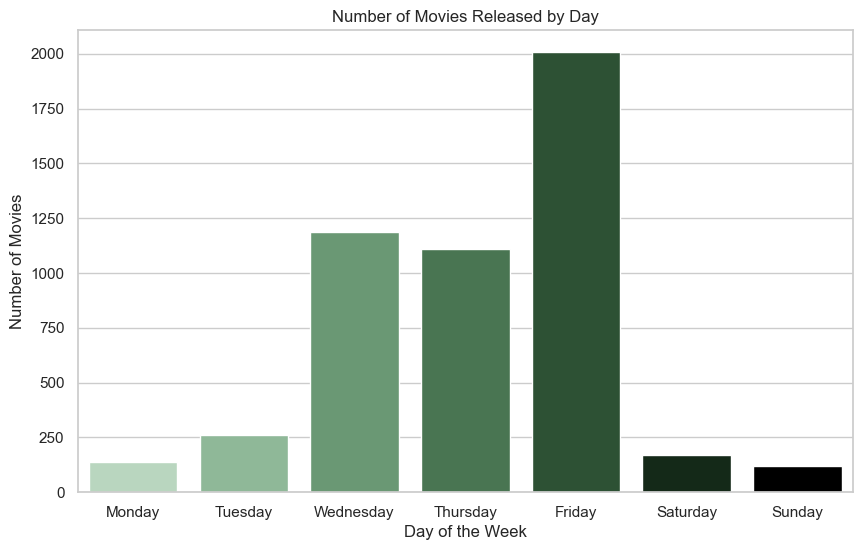

In [725]:
# show the amount of movies released by each day of week
plt.figure(figsize=(10, 6))
sns.countplot(data=df_eda, x="day", palette="ch: start=2, rot=0, dark=0, light=.80")
plt.title('Number of Movies Released by Day')
plt.ylabel('Number of Movies')
plt.xlabel('Day of the Week')
plt.show()

### **Understanding Critic vs Profit Weights**
- This realationship shows that these two variables have a reasonably similar correlations
- This tells us that when a movies profits increase there will be some significant increase in the ratings also
- However, there is room for movies with higher ratings that dont perform as well profit wise and vise versa, this is important to keep in mind when modeling

Text(0, 0.5, 'Profit Weight')

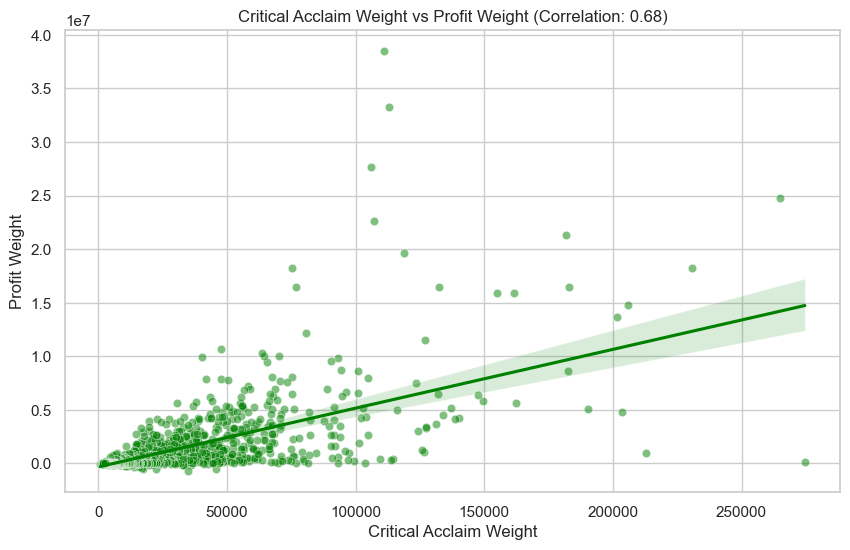

In [726]:
# critical acclaim weight by profit weight correlation with correlation in title with correlation line with no shadow
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='critic_acclaim_weight', y='profit_weight', alpha=0.5, color= 'green')
sns.regplot(data=df_eda, x='critic_acclaim_weight', y='profit_weight', scatter=False, color='green')
plt.title('Critical Acclaim Weight vs Profit Weight (Correlation: {:.2f})'.format(df_eda['critic_acclaim_weight'].corr(df_eda['profit_weight'])))
plt.xlabel('Critical Acclaim Weight')
plt.ylabel('Profit Weight')


### **Average Profit and Critical Acclaim by Month**
- These plots continue to highlight the correlation between profitability and critical ratings
- While both distributions are similar, there are notable differences — for example, January shows higher average profits despite lower critical acclaim
- This is interesting, as January often features “throwaway horror” releases that perform well financially but offer little in terms of critical value
- This also shows which months might be more benifitial to release movies in depending on goals or wanted outcomes
- Releasing movies in months 5 or 6 (May or June) tend to have the best releases critically and profitability

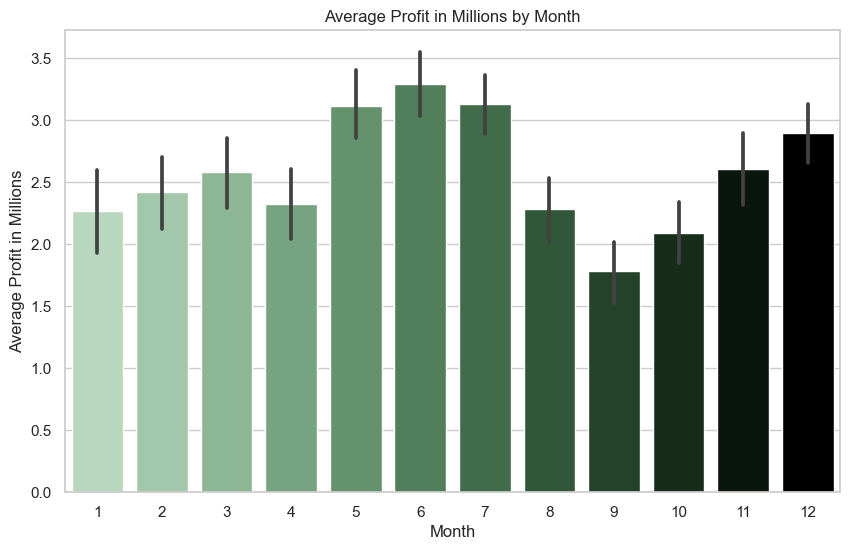

In [727]:
# average profit in millions by month 
plt.figure(figsize=(10, 6))
sns.barplot(data=df_eda, x='month', y='profit_in_millions', palette="ch: start=2, rot=0, dark=0, light=.80")
plt.title('Average Profit in Millions by Month')
plt.ylabel('Average Profit in Millions')
plt.xlabel('Month')
plt.show()

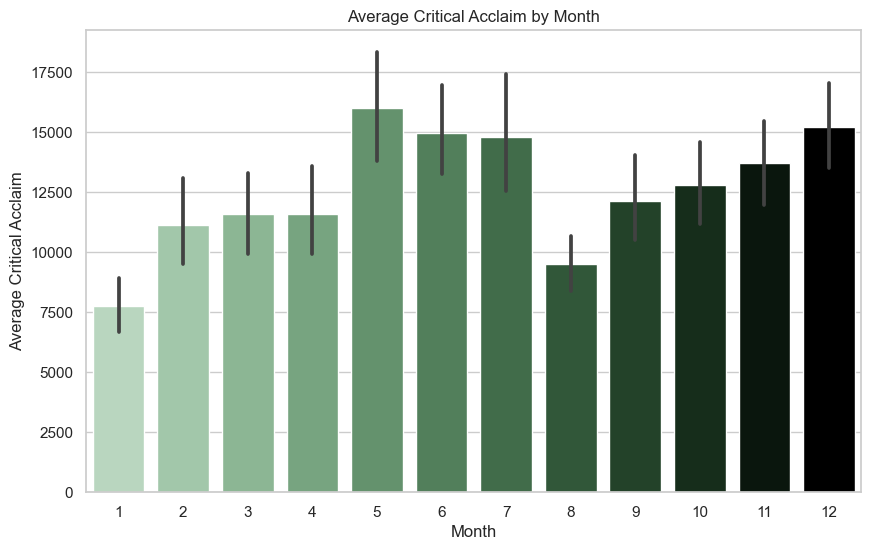

In [728]:
# average critical_acclaim by month
plt.figure(figsize=(10, 6))
sns.barplot(data=df_eda, x='month', y='critic_acclaim_weight', palette="ch: start=2, rot=0, dark=0, light=.80")
plt.title('Average Critical Acclaim by Month')
plt.ylabel('Average Critical Acclaim')
plt.xlabel('Month')
plt.show()

### **Rating v Profits**
- This visualization is interesting because earlier I compared profit weight and critical weight — both of which are derived from ratings and profit
- That previous comparison showed a relatively strong correlation of 0.68, while this direct comparison between rating and profit yields a much weaker correlation of 0.15
- This suggests that while ratings and profits contribute to similar metrics, they do not necessarily move together directly
- It highlights that a highly rated film isn't always profitable, and some financially successful films arent always going to be critically acclaimed

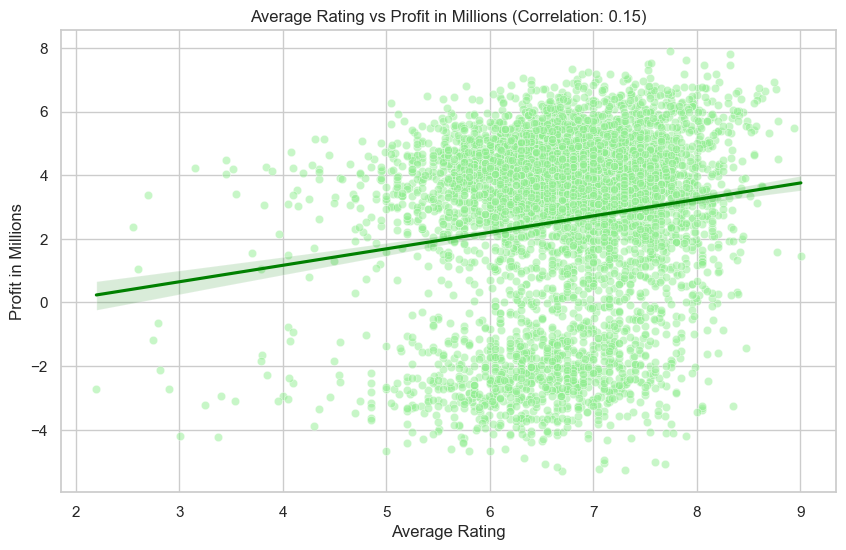

In [729]:
# average rating by profit in millions with correlation lin and title
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='average_rating', y='profit_in_millions', alpha=0.5, color='lightgreen')
sns.regplot(data=df_eda, x='average_rating', y='profit_in_millions', scatter=False, color='green')
plt.title('Average Rating vs Profit in Millions (Correlation: {:.2f})'.format(df_eda['average_rating'].corr(df_eda['profit_in_millions'])))
plt.xlabel('Average Rating')
plt.ylabel('Profit in Millions')
plt.show()

### **Slight Adjustment of Genres and COunting Each Genre By Row**
- This is to do a couple distribution checks to understand counts and realationships to profit and ratings

In [730]:
# remove genres with less than 10 occurrences
genre_counts = df_eda['genres'].value_counts()
df_eda = df_eda[df_eda['genres'].isin(genre_counts[genre_counts >= 2].index)]

In [731]:
# Convert string representations of lists into actual Python lists
df_eda['genres'] = df_eda['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now flatten and count genres
all_genres = [genre for genre_list in df_eda['genres'] for genre in genre_list]
genre_counts = Counter(all_genres)
genre_counts

Counter({'Drama': 1885,
         'Comedy': 1394,
         'Thriller': 1196,
         'Action': 1086,
         'Crime': 711,
         'Adventure': 703,
         'Romance': 661,
         'Horror': 563,
         'Science Fiction': 494,
         'Fantasy': 368,
         'Mystery': 339,
         'Family': 309,
         'History': 206,
         'Animation': 162,
         'War': 111,
         'Music': 71,
         'Western': 38,
         'Documentary': 12})

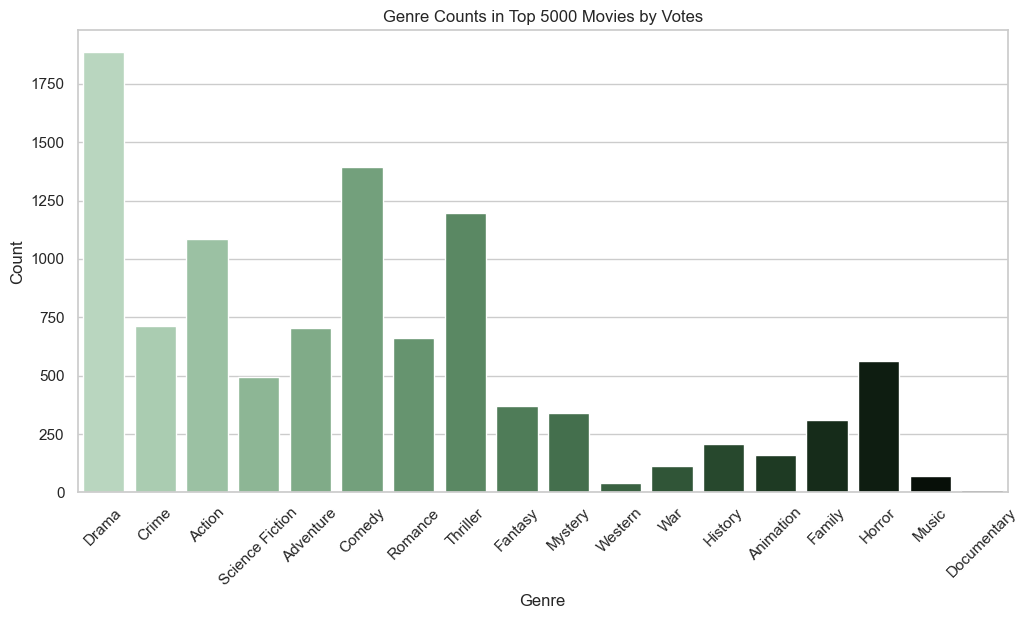

In [732]:
# create barchart from genre counts
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette="ch: start=2, rot=0, dark=0, light=.80")
plt.title('Genre Counts in Top 5000 Movies by Votes')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

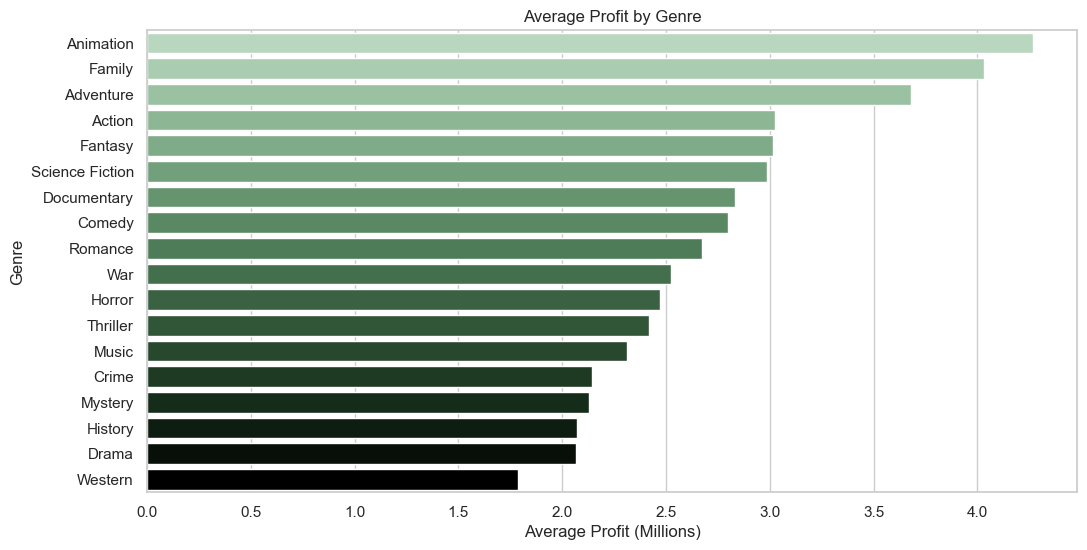

In [733]:

# show average profit by genre
df_genre_exploded = df_eda.explode('genres')
profit_by_genre = df_genre_exploded.groupby('genres')['profit_in_millions'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=profit_by_genre.values, y=profit_by_genre.index, palette="ch: start=2, rot=0, dark=0, light=.80")
plt.title('Average Profit by Genre')
plt.xlabel('Average Profit (Millions)')
plt.ylabel('Genre')
plt.show()


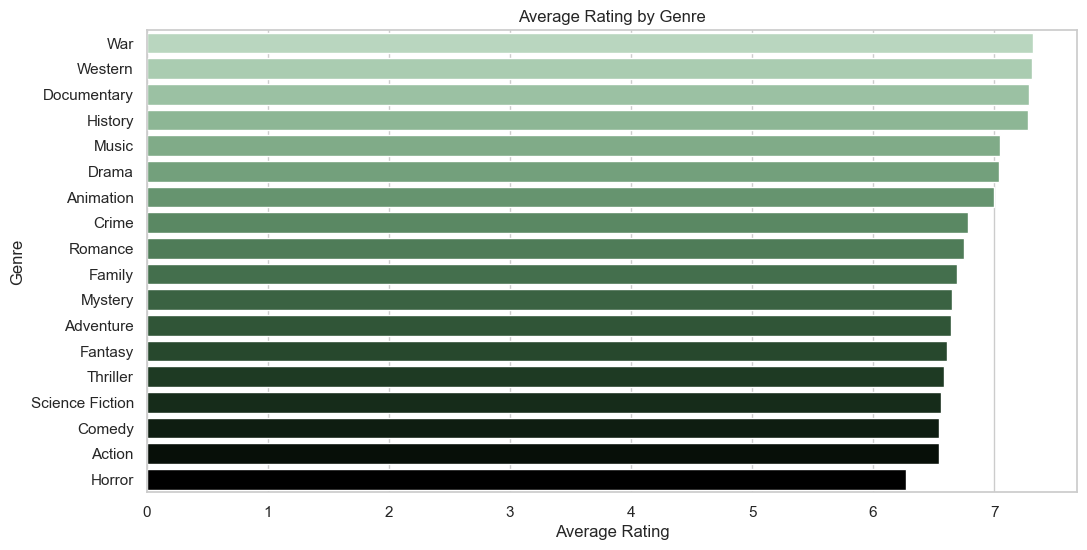

In [734]:
# show average rating by genre
rating_by_genre = df_genre_exploded.groupby('genres')['average_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=rating_by_genre.values, y=rating_by_genre.index, palette="ch: start=2, rot=0, dark=0, light=.80")
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


### **Comparing Votes to Critical Acclaim and Profit Weight**
- These visualizations show that vote counts tend to correlate more strongly with critical acclaim than with profit weight
- This suggests that movies which leave an impact or carry a strong message are more likely to inspire audiences to vote on IMDb, which makes sense
- It reinforces the idea that audience engagement is more closely tied to emotional or intellectual resonance than financial performance

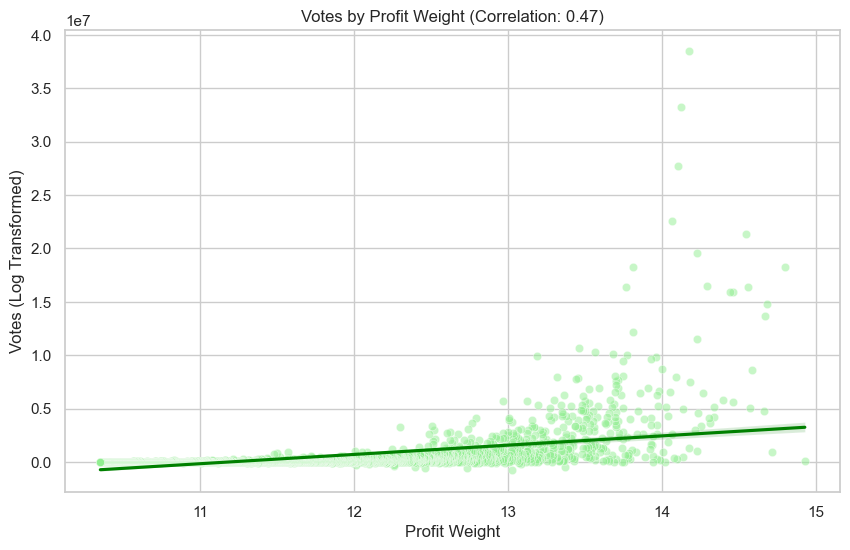

In [735]:
# show votes by profit_weight
vote_to_profit_corr = df_eda['votes'].corr(df_eda['profit_weight'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='votes',y='profit_weight', alpha=0.5,color='lightgreen')
sns.regplot(data=df_eda, x='votes',y='profit_weight',scatter=False,color='green')
plt.title('Votes by Profit Weight (Correlation: {:.2f})'.format(vote_to_profit_corr))
plt.xlabel('Profit Weight')
plt.ylabel('Votes (Log Transformed)')
plt.show()

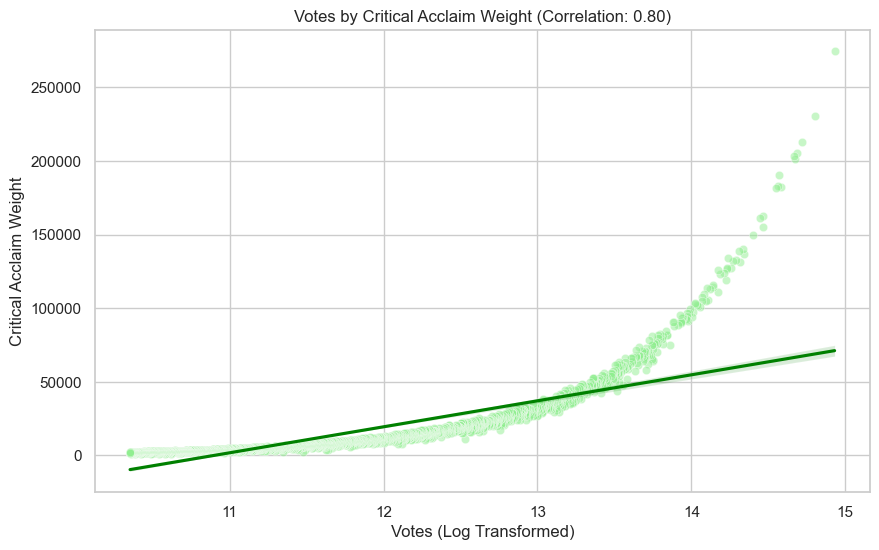

In [736]:
vote_to_critic_corr = df_eda['votes'].corr(df['critic_acclaim_weight'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='votes', y='critic_acclaim_weight', alpha=0.5, color='lightgreen')
sns.regplot(data=df_eda, x='votes', y='critic_acclaim_weight', scatter=False, color='green')
plt.title('Votes by Critical Acclaim Weight (Correlation: {:.2f})'.format(vote_to_critic_corr))
plt.xlabel('Votes (Log Transformed)')
plt.ylabel('Critical Acclaim Weight')
plt.show()

### **Word Bubble for Quick Taglin Understanding**
- Potential for feature engineering in ML modeling

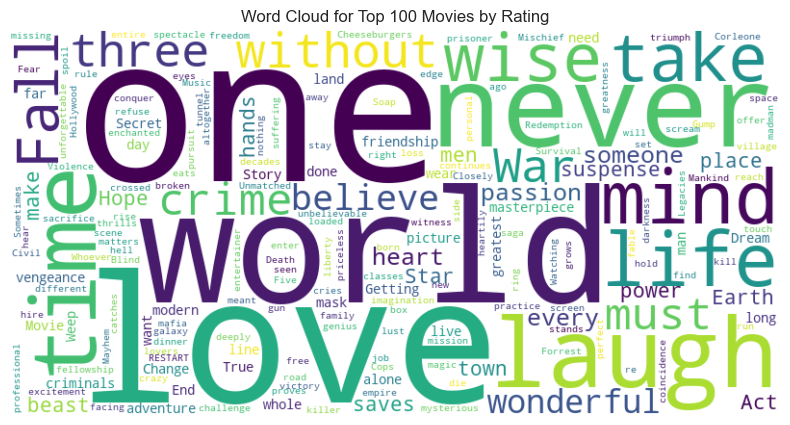

In [737]:
# tagline word bubble for top 100 movies - based on rating

top_100_movies_by_rating = df_eda.nlargest(100, 'average_rating')
tagline_text = ' '.join(top_100_movies_by_rating['tagline'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tagline_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 100 Movies by Rating')
plt.show()

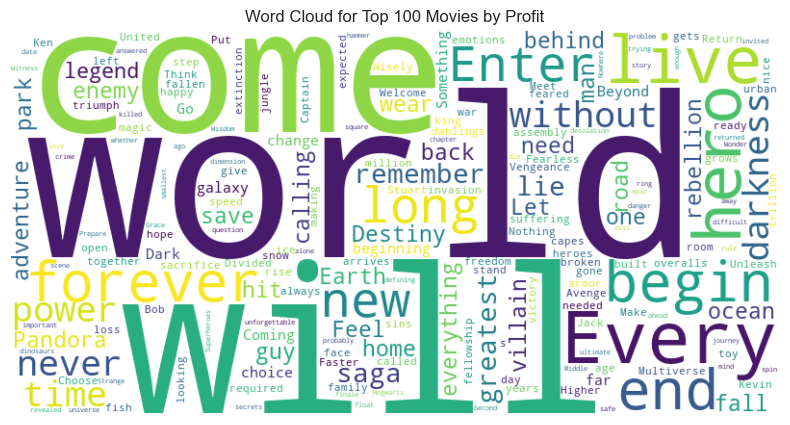

In [738]:
# tagline word bubble for top 100 movies - based on profit 

top_100_movies_by_profit = df_eda.nlargest(100, 'profit_in_millions')
tagline_text = ' '.join(top_100_movies_by_profit['tagline'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tagline_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 100 Movies by Profit')
plt.show()

##  **Key Insights from Exploratory Data Analysis**

###  Dataset Focus
- This analysis focuses on TMDB + IMDb movie data, aiming to uncover patterns between financial performance, critical acclaim, and audience engagement  
- A filtered subset was used for EDA to remove noise from obscure entries, while the full cleaned dataset is kept for modeling



###  Distribution Patterns
- **Budget and Revenue** both showed a strong left skew, then after cutting off the data for eda it displayed a strong right-skew due to blockbuster outliers; applying log transformations helped normalize these distributions for better comparison and visualization  
- **Profit** (calculated as revenue minus budget) reveals many low or negative profit films, supporting the industry reality that a large majority of movies underperform  
- **Runtime and Ratings** are generally centered, but runtime had visible long tails indicating some extreme values that I later removed (movies over 5 hours etc)



###  Correlation Insights
- **Votes and Critical Acclaim** are highly correlated (0.66), suggesting that audience engagement on IMDb is more tied to perceived quality than to profitability  
- **Rating vs. Profit** shows a weak correlation (0.15), reinforcing that financial success and critical success are often disconnected  
- **Profit vs. Budget** demonstrates a loose but nonlinear relationship — while larger budgets can lead to higher profits, the risk is also greater



###  Genre & Release Trends
- **Genre Analysis** revealed that Action, Drama, Thriller and Comedy dominate in frequency, but **Animation, Family and Adventure** films often have the best profit margins
- **Release Month Analysis** showed that January can be profitable despite low critical acclaim — possibly due to low competition and genre-specific seasonal demand 
- **Weekday Release Trends** suggest that Friday and Wednesday are the most popular release days, aligning with traditional marketing strategies



###  Feature Engineering Highlights
- **Log-Transformed Variables** (budget, revenue, votes, profit) were prepared to address skew and enhance feature interpretability for modeling  
- **Profit Weight and Critical Weight** were created as hybrid metrics to capture normalized versions of financial and critical performance, and proved highly correlated (0.68)  
- Manual reordering of categorical variables like weekdays was implemented to improve the clarity of time-related plots



###  Overall Summary
- The EDA revealed that **profitability, critical acclaim, and audience votes** are related but not interchangeable — each tells a different story about a movie’s performance  

- **Emotional or message-driven films** tend to earn more user votes, while **financially successful films** will only rank highly with critics on occasion

- These insights provide a solid foundation for selecting meaningful features in the upcoming modeling phase, particularly for profit prediction and movie recommendation